In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# --- 1) Crea rete
bn = gum.BayesNet("MedicalBN")

def bool_var(name, desc):
    v = gum.LabelizedVariable(name, desc, 2)
    v.changeLabel(0, "F")
    v.changeLabel(1, "T")
    return v

In [2]:
bn.add(bool_var("A", "Trip2Asia"))
bn.add(bool_var("S", "Smoker"))
bn.add(bool_var("T", "Tuberculosis"))
bn.add(bool_var("L", "Cancer"))
bn.add(bool_var("E", "TuberculosisOrCancer"))
bn.add(bool_var("B", "Brinchitis"))
bn.add(bool_var("X", "XrayTest"))
bn.add(bool_var("D", "Dyspnoea"))

bn.addArc("A", "T")
bn.addArc("S", "L")
bn.addArc("S", "B")
bn.addArc("T", "E")
bn.addArc("L", "E")
bn.addArc("B", "D")
bn.addArc("E", "D")
bn.addArc("E", "X")

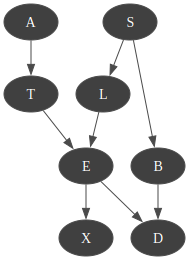

In [3]:
# --- 2) Prior e modello
# Priors: uniform
bn.cpt("A").fillWith([0.99, 0.01])
bn.cpt("S").fillWith([0.50, 0.50])

bn.cpt("T")[{"A": 1}] = [0.95, 0.05]
bn.cpt("T")[{"A": 0}] = [0.99, 0.01]

bn.cpt("L")[{"S": 1}] = [0.90, 0.10]
bn.cpt("L")[{"S": 0}] = [0.99, 0.01]

bn.cpt("B")[{"S": 1}] = [0.40, 0.60]
bn.cpt("B")[{"S": 0}] = [0.70, 0.30]

bn.cpt("X")[{"E": 1}] = [0.02, 0.98]
bn.cpt("X")[{"E": 0}] = [0.95, 0.05]

bn.cpt("E")[{"T": 1, "L": 1}] = [0.00, 1.00]
bn.cpt("E")[{"T": 1, "L": 0}] = [0.00, 1.00]
bn.cpt("E")[{"T": 0, "L": 1}] = [0.00, 1.00]
bn.cpt("E")[{"T": 0, "L": 0}] = [1.00, 0.00]

bn.cpt("D")[{"E": 1, "B": 1}] = [0.10, 0.90]
bn.cpt("D")[{"E": 1, "B": 0}] = [0.30, 0.70]
bn.cpt("D")[{"E": 0, "B": 1}] = [0.20, 0.80]
bn.cpt("D")[{"E": 0, "B": 0}] = [0.90, 0.10]

# --- 3) Visualizza rete (struttura)
gnb.showBN(bn)

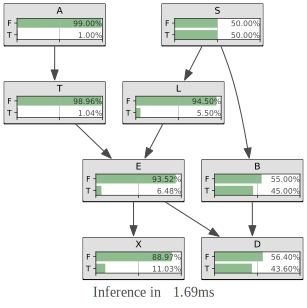

In [4]:
# --- 4) "Prior" (nessuna evidenza): nei nodi vedi le marginali a priori
gnb.showInference(bn, evs={})

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

vars_ = ["A", "S", "X", "D"]

selectors = {}
for v in vars_:
    selectors[v] = widgets.Dropdown(
        options=[("— (nessuna evidenza)", None), ("F", 0), ("T", 1)],
        value=None,
        description=v + ":",
        layout=widgets.Layout(width="200px")
    )

out = widgets.Output()

def render(_=None):
    evs = {v: selectors[v].value for v in vars_ if selectors[v].value is not None}
    with out:
        clear_output(wait=True)
        gnb.showInference(bn, evs=evs)

for v in vars_:
    selectors[v].observe(render, names="value")

ui = widgets.VBox([widgets.HBox([selectors[v] for v in vars_]), out])
display(ui)
render()